In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

api_key = "b9398d700c7fe8d84947f0c8d40be469"
temp_units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#lists
lat_lngs = []
cities = []

# random lat and lng
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
for x in lat_lngs:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    # If unique
    if city not in cities:
        cities.append(city)
        
len(cities)

610

In [4]:
print(cities)

['matagami', 'codrington', 'illoqqortoormiut', 'coari', 'adrar', 'ntungamo', 'saint-philippe', 'kruisfontein', 'kazalinsk', 'port alfred', 'harper', 'salalah', 'qaanaaq', 'ushuaia', 'jamestown', 'kismayo', 'bredasdorp', 'ancud', 'jawhar', 'hithadhoo', 'massaguet', 'balkanabat', 'hermanus', 'nanortalik', 'collierville', 'carutapera', 'taolanaro', 'dikson', 'mwene-ditu', 'tubruq', 'punta arenas', 'castro', 'mizan teferi', 'vagur', 'ribeira grande', 'coihaique', 'hurghada', 'narsaq', 'cape town', 'mar del plata', 'itarema', 'geraldton', 'sambava', 'tasiilaq', 'meghraj', 'formoso do araguaia', 'belushya guba', 'nicoya', 'lagunas', 'emba', 'georgetown', 'ilulissat', 'cockburn town', 'srivardhan', 'aguas vermelhas', 'rodrigues alves', 'barentsburg', 'busselton', 'santarem', 'beyneu', 'kalengwa', 'gunjur', 'paramonga', 'juruti', 'sergeyevka', 'birao', 'oranjemund', 'ilo', 'kaman', 'upernavik', 'ponta do sol', 'deep river', 'boueni', 'east london', 'arinos', 'usinsk', 'sao filipe', 'the valley

In [11]:
#api list
city_name = []
country = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
#for x in cities:
#    city_name.append(x)
#print(city_name)

In [12]:
counter = 1
for city in cities:
    city_url= url + "&q=" + city #+ "&units=imperial"
    #print(city_url)
    try: 
        response = requests.get(city_url).json()
        #response["name"]
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"]) 
        wind_speed.append(response["wind"]["speed"])
        
        counter = counter + 1
        time.sleep(1.05)
    except:
        print("City not found")
        city_name.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        lat.append(np.nan)
        lng.append(np.nan)
        max_temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan) 
        wind_speed.append(np.nan)
    continue

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


In [17]:
weather_data = {
    "City name": city_name,
    "Country":country,
    "Date":date,
    "Latitude":lat, 
    "Longitud":lng,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed
    }
weather_df = pd.DataFrame(weather_data)
weather_df.head(20)

,City name,Country,Date,Latitude,Longitud,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Matagami,NG,1.573093e+09,9.67,8.40,293.84,50.0,1.0,1.46
1,Codrington,AU,1.573093e+09,-28.95,153.24,307.59,10.0,40.0,3.60
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coari,BR,1.573093e+09,-4.09,-63.14,299.67,71.0,57.0,0.79
4,Adrar,DZ,1.573093e+09,27.87,-0.29,289.15,36.0,0.0,6.20
5,Ntungamo,UG,1.573093e+09,-0.87,30.27,288.00,91.0,0.0,0.52
6,Saint-Philippe,CA,1.573093e+09,45.36,-73.48,277.59,59.0,90.0,4.60
7,Kruisfontein,ZA,1.573093e+09,-34.00,24.73,286.82,80.0,97.0,11.10
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Port Alfred,ZA,1.573093e+09,-33.59,26.89,289.82,88.0,100.0,2.24


In [ ]:
weather_df2 = weather

In [18]:
len(weather_df)

610

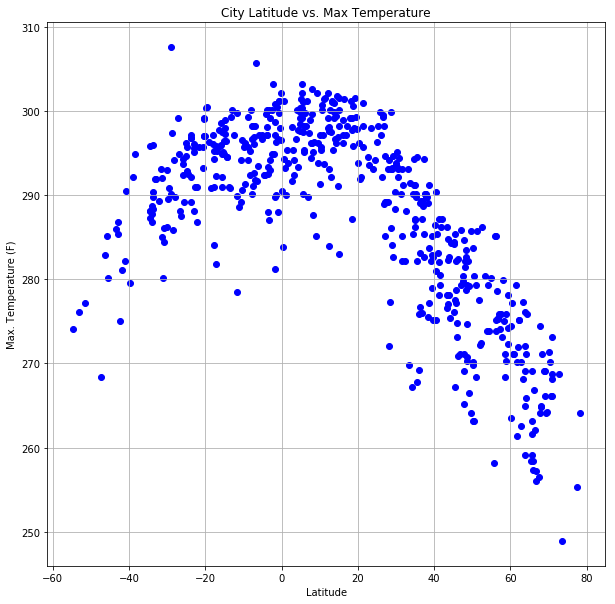

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker="o", color="blue")

#graph detail
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#saving figure
#plt.savefig("Output_Plots/LatitudevsMaxtempeture.png")

#show graph          
plt.show()          

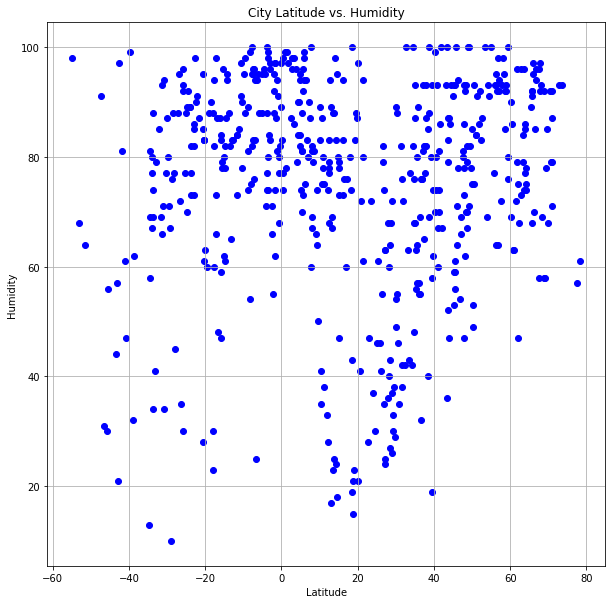

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", color="blue")

#graph detail
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#saving figure
#plt.savefig("Output_Plots/LatitudevsHumidity.png")

#show graph          
plt.show()     

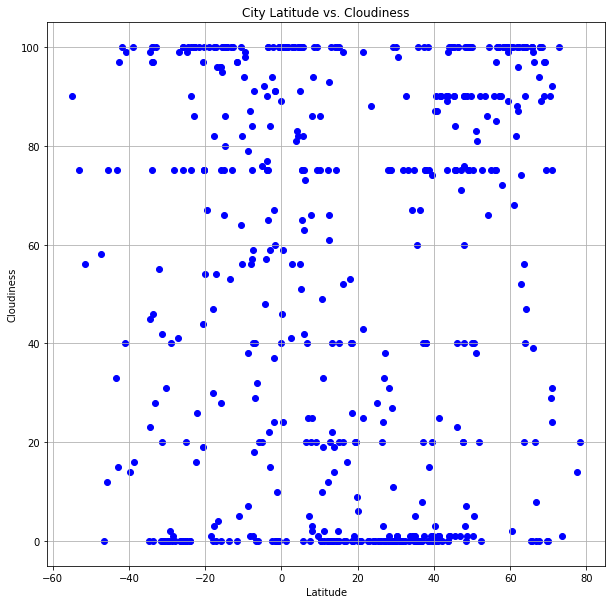

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", color="blue")

#graph detail
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#saving figure
#plt.savefig("Output_Plots/LatitudevsCloudiness.png")

#show graph          
plt.show()     

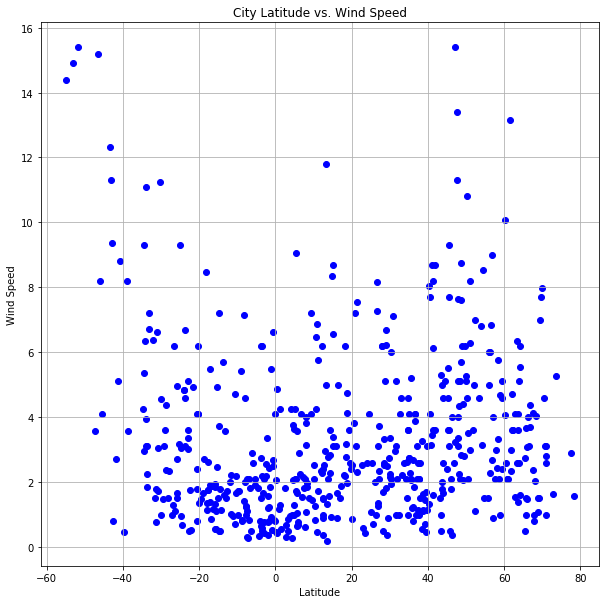

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", color="blue")

#graph detail
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#saving figure
#plt.savefig("Output_Plots/LatitudevsWindSpeed.png")

#show graph          
plt.show()